# **Détermination du Nombre Optimal de Clusters avec les Méthodes du Coude et de la Silhouette**


## **Importation de bibliothèques et génération de données**

In [ ]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Générer un jeu de données non supervisé avec make_blobs
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


## **La méthode du coude**

### **Description de la méthode**

La méthode du coude est une technique heuristique utilisée pour déterminer le nombre optimal de clusters (K) pour un algorithme de clustering, comme K-Means. Le principe est basé sur la mesure de la "somme des carrés intra-cluster" (WCSS - Within-Cluster Sum of Squares), également appelée inertie. La WCSS mesure la distance moyenne au carré entre chaque point de données et le centroïde de son cluster attribué.

Le processus est le suivant :

1. **Calcul de la WCSS pour différents K :** L'algorithme K-Means est exécuté plusieurs fois, en faisant varier le nombre de clusters (K), généralement de 1 à un nombre maximum prédéfini (par exemple, 10).
2. **Enregistrement de l'inertie :** Pour chaque valeur de K, la WCSS (inertie) est calculée et enregistrée.
3. **Tracé du graphique :** Un graphique est tracé avec le nombre de clusters (K) sur l'axe des x et la WCSS (inertie) sur l'axe des y.
4. **Recherche du "coude" :** On observe le graphique pour identifier le point où la diminution de l'inertie commence à ralentir de manière significative. Ce point ressemble souvent à un coude (elbow), d'où le nom de la méthode.

L'idée derrière cette méthode est que l'ajout de clusters supplémentaires après le point du coude n'apporte pas une réduction substantielle de la WCSS, ce qui suggère que la plupart des variations dans les données ont déjà été expliquées par le nombre de clusters au niveau du coude.

### **Implémentation de la méthode**

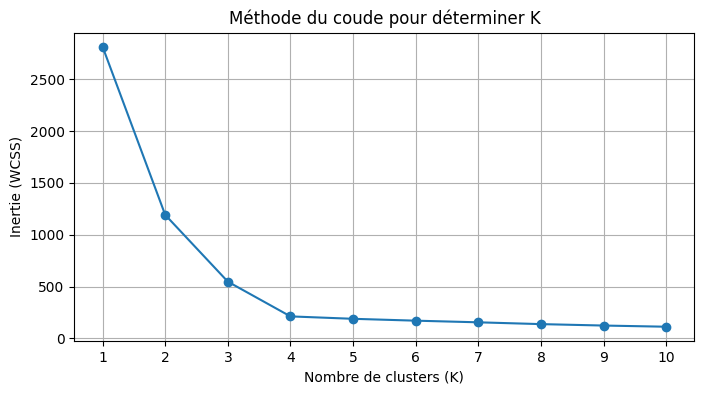

In [ ]:
# Méthode du coude (Elbow Method)
inertia = []
k_range = range(1, 11)  # Tester de 1 à 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Méthode du coude pour déterminer K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


Ce graphique illustre la relation entre le nombre de clusters (K) et l'inertie (WCSS).

On observe une diminution rapide de l'inertie à mesure que le nombre de clusters augmente. Ceci est attendu, car un plus grand nombre de clusters permet un meilleur regroupement des points de données.

En examinant attentivement le graphique, on recherche le point où la courbe change de direction de manière plus nette, formant ainsi un "coude". Dans notre cas, un changement de pente notable est observé autour de K = 4. La diminution de l'inertie devient moins prononcée après ce point.

Ainsi, selon la méthode du coude, K = 4 est un bon candidat pour le nombre optimal de clusters de notre jeu de données. À ce point, l'ajout d'un cluster supplémentaire n'entraîne plus d'amélioration significative de la compacité des clusters (mesurée par l'inertie).

Il est important de noter que la méthode du coude est une heuristique et peut parfois être subjective. Il est donc souvent recommandé de la combiner avec d'autres méthodes, telles que la méthode de la silhouette, afin de confirmer le nombre optimal de clusters.

## **La méthode de la silhouette**

### **Description de la méthode**

La méthode de la silhouette est une autre technique pour évaluer la qualité des clusters et aider à déterminer le nombre optimal de clusters (K). Le score de silhouette mesure la qualité de l'affectation de chaque point de données à son cluster, en prenant en compte à la fois sa proximité avec les points de son propre cluster et sa distance par rapport aux points des clusters voisins.

Pour chaque point de données, le score de silhouette (s) est calculé comme suit :

$s = \frac{(b - a)}{\max(a, b)}$

Où :
* $a$ est la distance moyenne entre le point de données et tous les autres points du **même cluster**.
* $b$ est la distance moyenne entre le point de données et tous les points du **cluster le plus proche** (le cluster voisin le plus proche).

Le score de silhouette varie de -1 à +1 :

* Un score proche de +1 indique que le point de données est bien regroupé avec les points de son propre cluster et bien séparé des autres clusters.
* Un score proche de 0 indique que le point de données est très proche de la frontière entre deux clusters, ce qui suggère qu'il pourrait être mal classé.
* Un score proche de -1 indique que le point de données a probablement été attribué au mauvais cluster.

Pour évaluer la qualité globale du clustering pour une valeur de K donnée, on calcule le **score de silhouette moyen** sur tous les points de données. On recherche la valeur de K qui maximise ce score moyen.


### **Implémentation de la méthode**

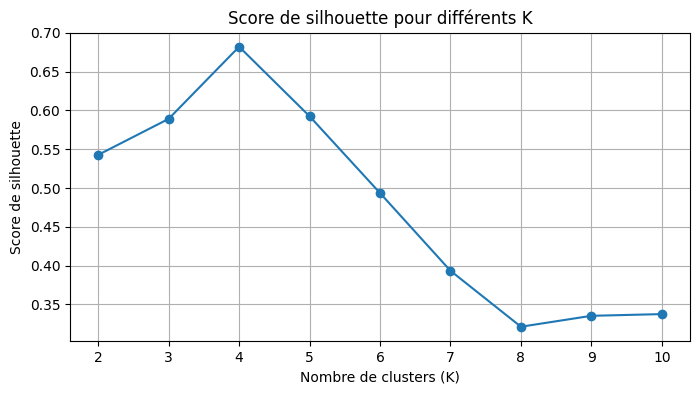

In [ ]:
# Méthode de la silhouette (Silhouette Score)
silhouette_scores = []
# La méthode de la silhouette nécessite au moins 2 clusters
k_range_silhouette = range(2, 11)

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Score de silhouette pour différents K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.xticks(k_range_silhouette)
plt.grid(True)
plt.show()

Notre graphique présente le score de silhouette moyen pour différentes valeurs de K, allant de 2 à 10. Il est important de noter que la méthode de la silhouette nécessite au moins deux clusters pour son calcul.

Nous observons la variation du score de silhouette moyen en fonction du nombre de clusters. Un score plus élevé indique une meilleure séparation entre les clusters. En d'autres termes, des clusters bien distincts et des points de données correctement attribués.

Pour déterminer le K optimal avec cette méthode, nous recherchons la valeur de K qui correspond au pic le plus élevé sur le graphique, c'est-à-dire celle qui maximise le score de silhouette moyen. Sur ce graphique, le score de silhouette semble atteindre son maximum pour K = 4.

Ainsi, selon la méthode de la silhouette, K = 4 apparaît comme le nombre optimal de clusters pour notre jeu de données. Un score de silhouette élevé à K=4 suggère que les clusters formés sont bien séparés et que les points de données sont correctement attribués à leurs clusters respectifs.

## **Conclusion sur le Nombre Optimal de Clusters**

Nous avons utilisé deux méthodes distinctes pour déterminer le nombre optimal de clusters pour notre jeu de données : la méthode du coude et la méthode de la silhouette.

La méthode du coude a mis en évidence un "coude" notable aux alentours de K = 4. Cela signifie qu'au-delà de ce point, l'ajout de clusters supplémentaires n'entraîne plus une réduction significative de l'inertie, ce qui suggère un rendement décroissant.

Parallèlement, la méthode de la silhouette a révélé un score de silhouette moyen maximal pour K = 4. Ce pic indique que les clusters sont les mieux définis et les mieux séparés pour cette valeur de K.

Étant donné que ces deux méthodes indépendantes convergent vers la même valeur, nous pouvons affirmer avec une plus grande confiance que le nombre optimal de clusters pour notre jeu de données est de 4.


## **Comparaison des Méthodes du Coude et de la Silhouette**

Bien que les méthodes du coude et de la silhouette visent toutes deux à déterminer le nombre optimal de clusters, leurs approches et leurs métriques diffèrent. Voici une comparaison de leurs caractéristiques principales :

| Caractéristique          | Méthode du Coude (Elbow Method)                      | Méthode de la Silhouette (Silhouette Method)             |
| :----------------------- | :--------------------------------------------------- | :------------------------------------------------------- |
| **Métrique Utilisée**    | Inertie (WCSS - Within-Cluster Sum of Squares)       | Score de Silhouette moyen                                |
| **Ce qu'elle Mesure**    | La compacité des clusters (distance des points aux centroïdes) | La compacité intra-cluster et la séparation inter-clusters |
| **Approche**             | Visuelle (recherche du "coude" sur le graphique)     | Quantitative (recherche du pic sur le graphique)         |
| **Interprétation**      | Le coude indique où l'ajout de clusters n'apporte plus de réduction significative de l'inertie. | Un score plus élevé indique de meilleurs clusters (bien séparés et compacts). |
| **Subjectivité**         | Peut être subjective pour identifier le coude.      | Moins subjective, basée sur une valeur numérique maximale. |
| **Sensibilité à la forme des clusters** | Moins sensible aux formes de clusters non sphériques. | Peut être affectée par des formes de clusters non sphériques. |
| **Coût Computationnel** | Généralement moins coûteuse (calcul de l'inertie).   | Peut être plus coûteuse (calcul des distances entre tous les points). |
| **Nombre minimal de clusters** | 1                                                    | 2 (nécessite au moins deux clusters pour calculer la séparation) |

**Points Communs**

Ces deux méthodes partagent plusieurs aspects fondamentaux :

* Elles sont des heuristiques conçues pour aider à déterminer le nombre optimal de clusters, sans être des solutions définitives.

* Elles nécessitent toutes deux d'exécuter l'algorithme de clustering (tel que K-Means) pour différentes valeurs de K afin d'évaluer les résultats.

* Elles sont fréquemment utilisées ensemble, se complétant mutuellement pour valider les résultats et renforcer la confiance dans le choix final de K.

**Limites**

Chaque méthode présente ses propres inconvénients :

* La méthode du coude est intuitive et facile à comprendre, mais son interprétation peut être subjective, car le "coude" n'est pas toujours clairement défini.

* La méthode de la silhouette offre une mesure plus quantitative de la qualité du clustering. Cependant, elle peut être plus coûteuse en calcul et sensible à des formes de clusters non sphériques, ce qui peut biaiser son évaluation.

Combiner les deux méthodes permet de tirer parti des forces de chacune, offrant ainsi une évaluation plus complète et fiable du nombre optimal de clusters. Cette approche combinée aide à compenser les limites individuelles et à obtenir une perspective plus robuste sur la structure de nos données.

## **Pourquoi Combiner les Méthodes du Coude et de la Silhouette ?**

Combiner les méthodes du coude et de la silhouette pour déterminer le nombre optimal de clusters est crucial. Cette approche offre une analyse plus robuste et réduit la subjectivité, menant à une décision plus fiable.

**Validation Croisée des Résultats**
* La méthode du coude s'appuie sur l'inertie (WCSS), qui mesure la compacité des clusters. Cependant, l'identification du "coude" peut parfois être visuellement ambiguë.
* La méthode de la silhouette évalue à la fois la compacité intra-cluster et la séparation inter-clusters. Un score élevé indique des clusters bien définis. Néanmoins, son score peut être influencé par la forme des clusters.

En utilisant les deux méthodes, nous pouvons valider les résultats de l'une avec l'autre. Si, comme dans notre cas, les deux méthodes convergent vers la même valeur (ici, K=4), nous avons une confiance bien plus élevée dans votre choix du nombre optimal de clusters.

**Réduction de la Subjectivité**

L'interprétation du graphique de la méthode du coude peut être subjective. Ce qui semble être un "coude" évident pour une personne peut être moins clair pour une autre. La méthode de la silhouette, quant à elle, fournit une métrique quantitative (le score de silhouette) qui permet d'identifier le K optimal de manière plus objective en recherchant le pic. Combiner ces approches réduit la dépendance à une unique interprétation visuelle ou à une seule métrique.

Une Vision Plus Complète

Les deux méthodes mesurent des aspects légèrement différents de la qualité du clustering :

* La méthode du coude se concentre sur la variance expliquée par l'ajout de chaque cluster.
* La méthode de la silhouette évalue la qualité de l'affectation de chaque point à son cluster.

En les considérant ensemble, nous obtenons une vision plus complète et nuancée de la structure de clustering au sein de nos données.

En Bref

Combiner la méthode du coude et la méthode de la silhouette nous permet de prendre une décision plus éclairée et fiable concernant le nombre optimal de clusters, minimisant les risques d'erreur d'interprétation basées sur une seule métrique. C'est une bonne pratique courante en analyse de clustering non supervisé.

